In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('datas/ufc-master.csv')
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0


In [3]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (6528, 118)


In [4]:
# Select meaningful columns and find null values
df = df[['RedWins','BlueWins','RedLosses','BlueLosses','RedCurrentWinStreak','BlueCurrentWinStreak','RedOdds','BlueOdds', 'RedAvgSigStrLanded', 'RedAvgSubAtt', 'RedAvgTDLanded' , 'BlueAvgSigStrLanded', 'BlueAvgSubAtt','BlueAvgTDLanded','Winner']]
#df = df.loc[~df['WeightClass'].isin(['Catch Weight',"Women's Bantamweight", "Women's Featherweight", "Women's Flyweight", "Women's Strawweight"])]
df.head()
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RedWins               6528 non-null   int64  
 1   BlueWins              6528 non-null   int64  
 2   RedLosses             6528 non-null   int64  
 3   BlueLosses            6528 non-null   int64  
 4   RedCurrentWinStreak   6528 non-null   int64  
 5   BlueCurrentWinStreak  6528 non-null   int64  
 6   RedOdds               6301 non-null   float64
 7   BlueOdds              6302 non-null   float64
 8   RedAvgSigStrLanded    6073 non-null   float64
 9   RedAvgSubAtt          6171 non-null   float64
 10  RedAvgTDLanded        6171 non-null   float64
 11  BlueAvgSigStrLanded   5598 non-null   float64
 12  BlueAvgSubAtt         5696 non-null   float64
 13  BlueAvgTDLanded       5695 non-null   float64
 14  Winner                6528 non-null   object 
dtypes: float64(8), int64(

In [5]:
# Drop null values
df = df.dropna()
print(f'Shape after dropping null values: {df.shape}')
print(df.isnull().sum())

Shape after dropping null values: (5249, 15)
RedWins                 0
BlueWins                0
RedLosses               0
BlueLosses              0
RedCurrentWinStreak     0
BlueCurrentWinStreak    0
RedOdds                 0
BlueOdds                0
RedAvgSigStrLanded      0
RedAvgSubAtt            0
RedAvgTDLanded          0
BlueAvgSigStrLanded     0
BlueAvgSubAtt           0
BlueAvgTDLanded         0
Winner                  0
dtype: int64


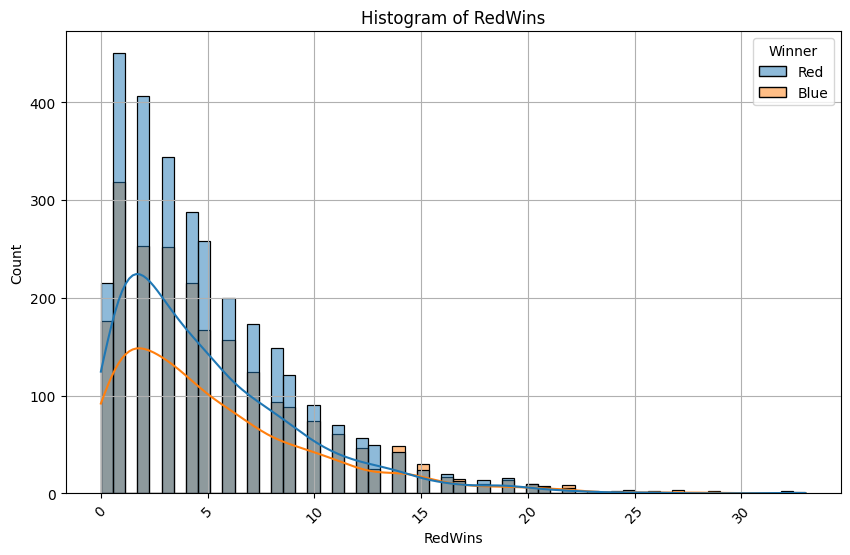

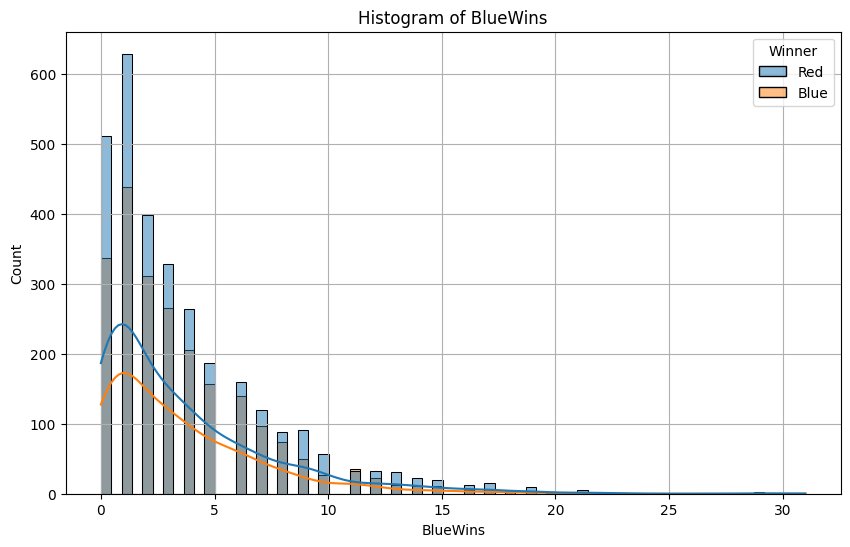

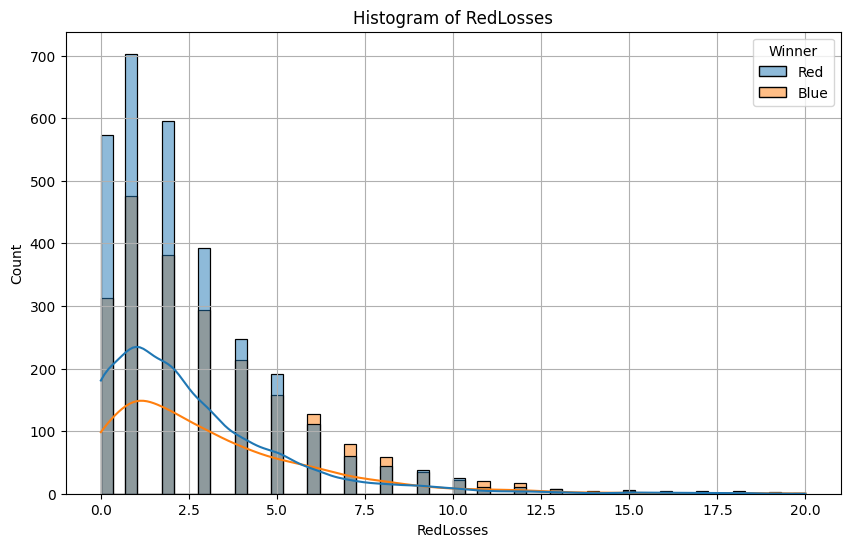

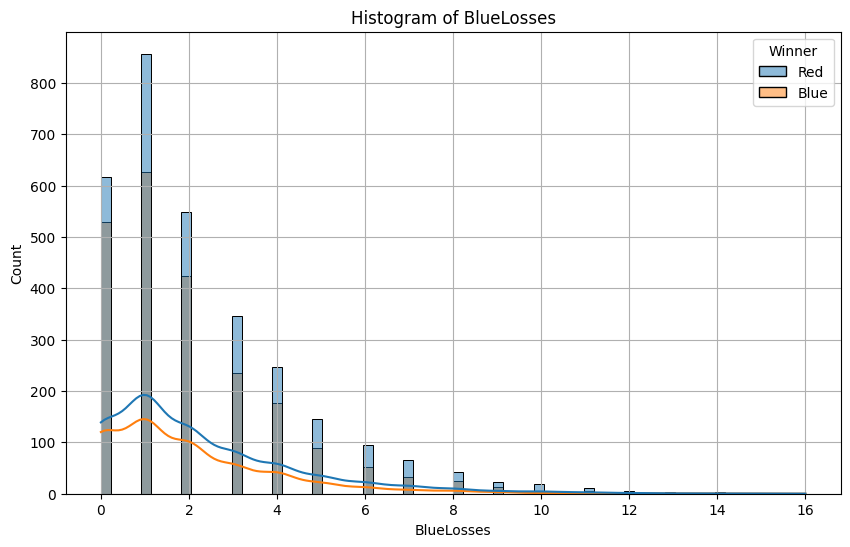

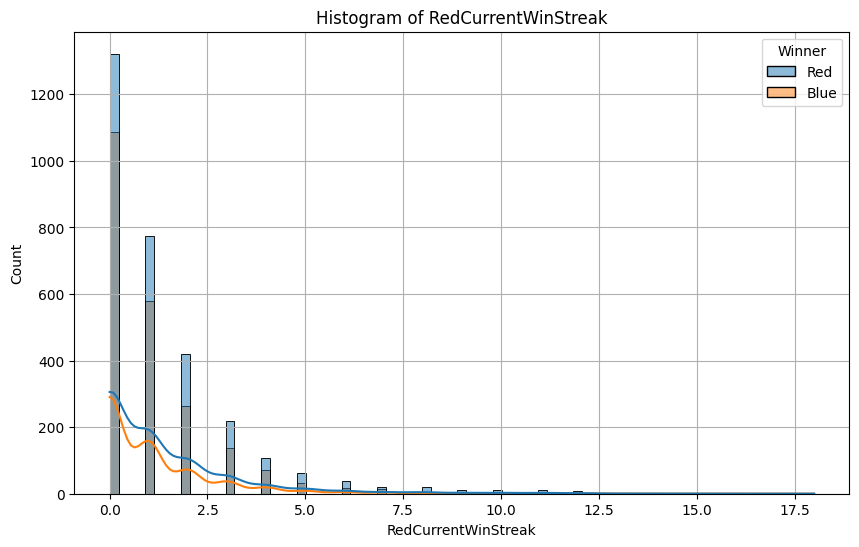

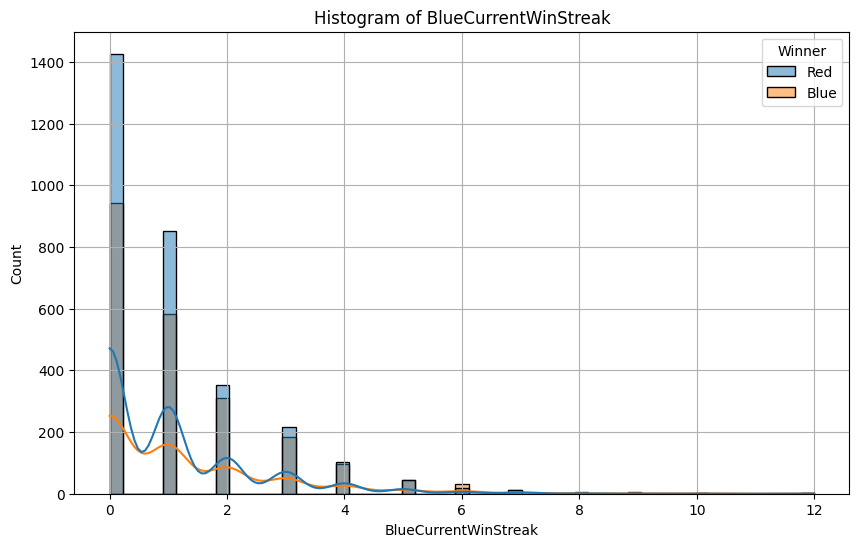

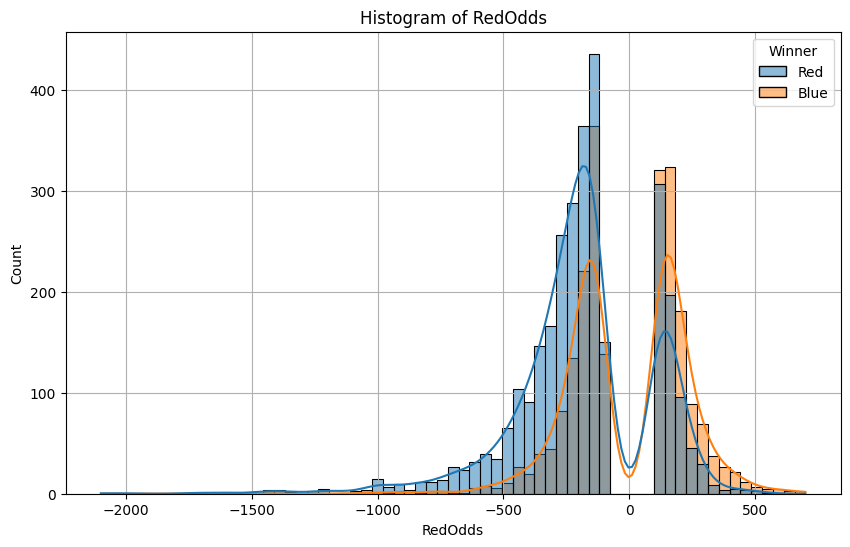

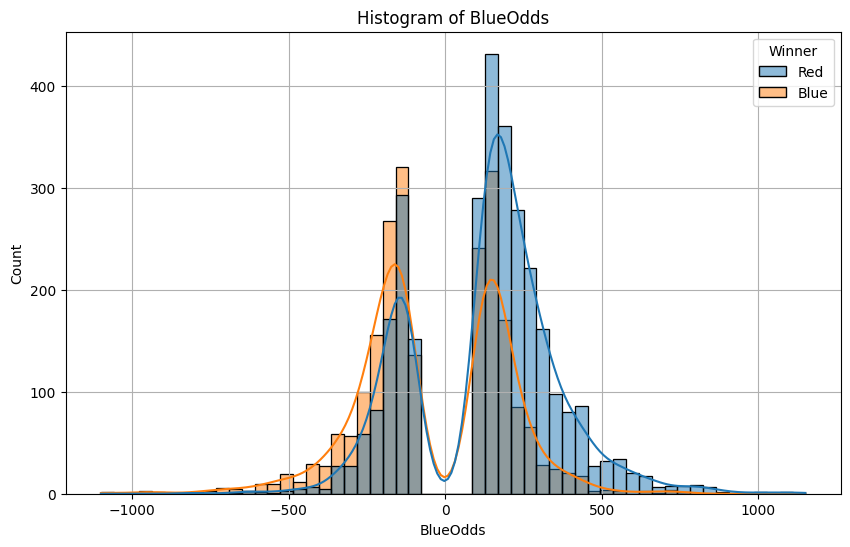

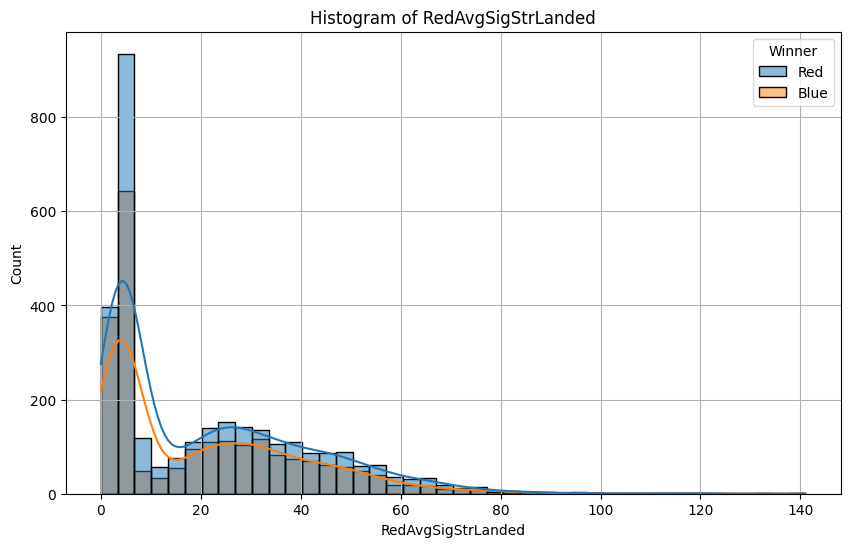

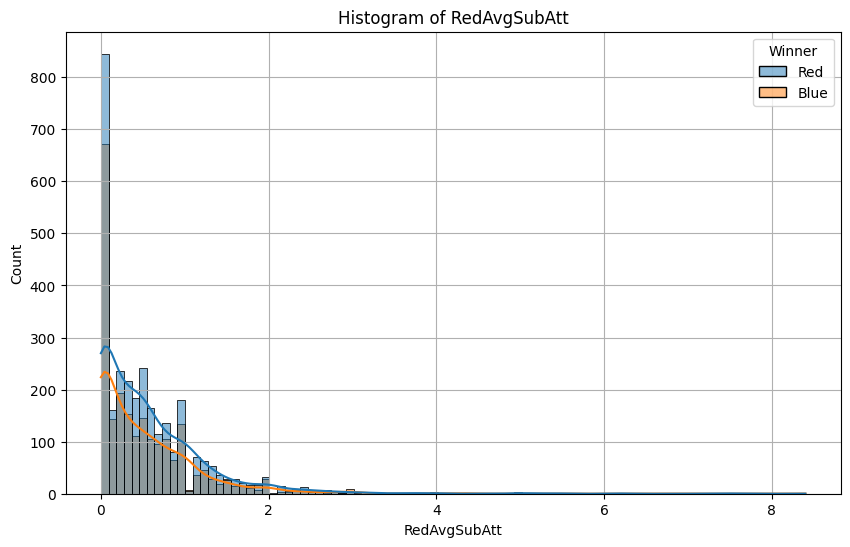

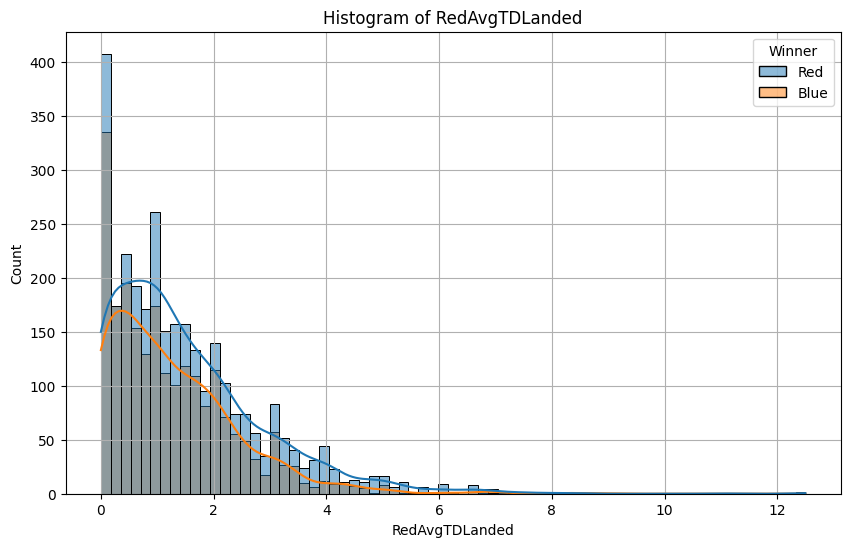

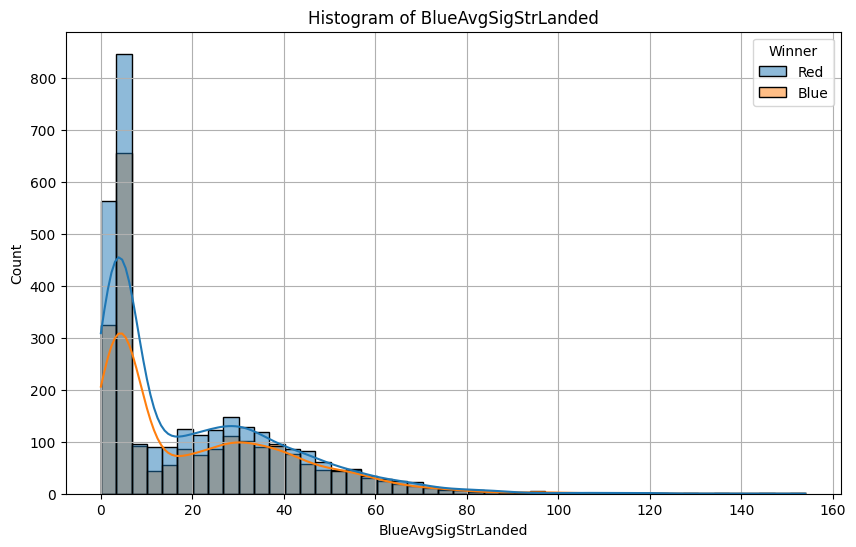

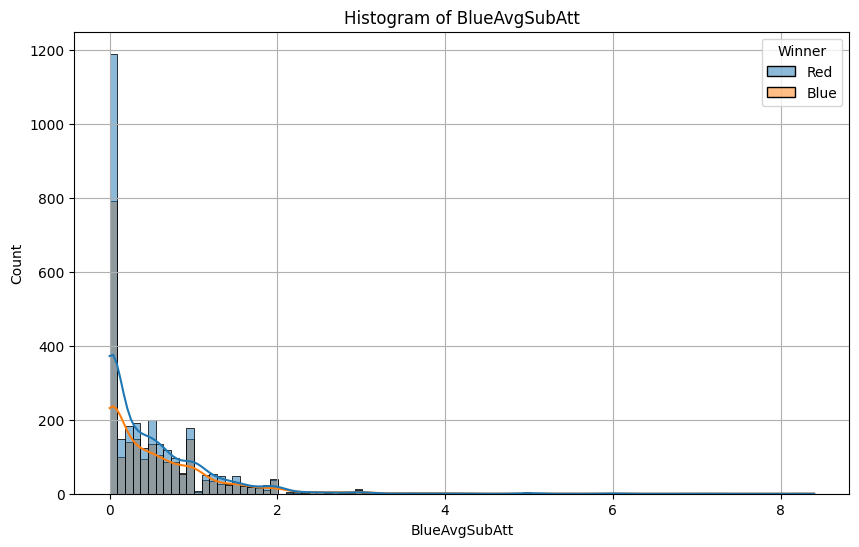

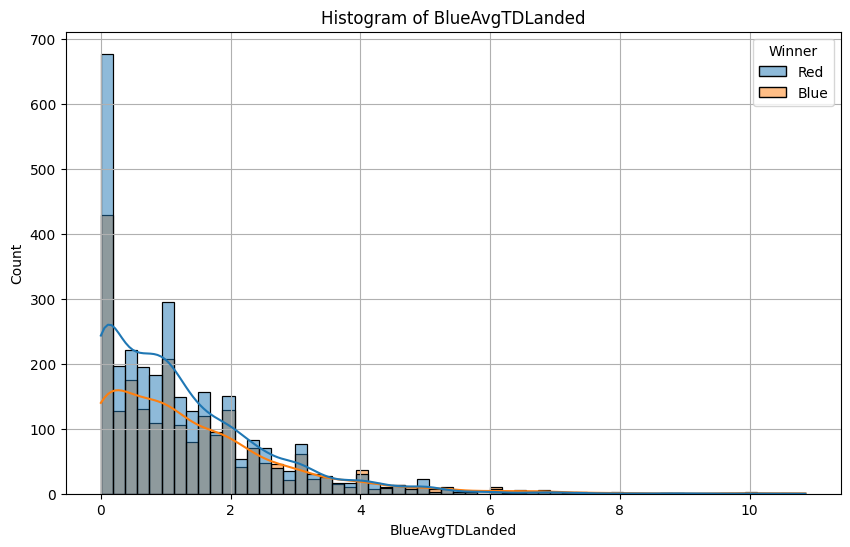

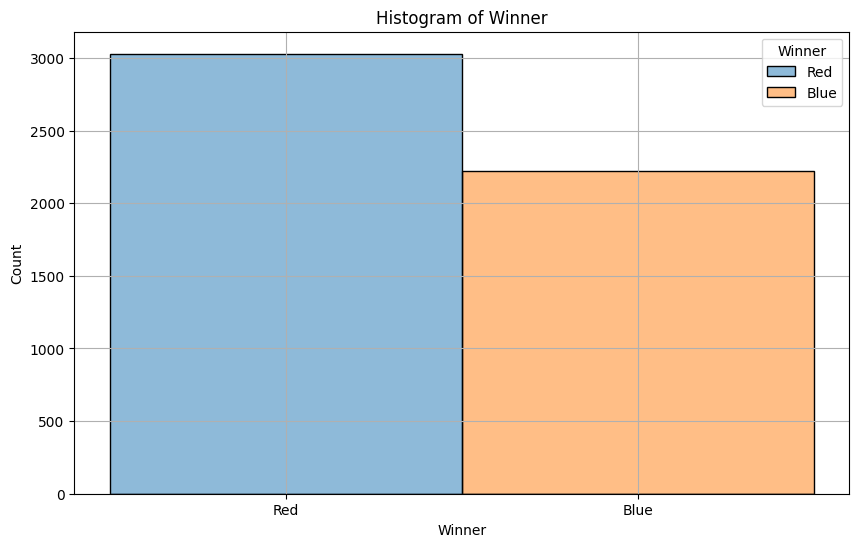

In [6]:
# Visualize data
c = 0
for i in df:
    plt.figure(figsize=(10, 6))
    sns.histplot(x = df[i], hue=df['Winner'], kde=True)
    plt.title(f'Histogram of {i}')
    plt.grid(True)
    if c == 0:
        plt.xticks(rotation=45)
    plt.show()
    c = 1

In [7]:
# Ordinal Encoding and Dummy Variables 
# from sklearn.preprocessing import OrdinalEncoder
# encoder = OrdinalEncoder()
# df[['Winner']] = encoder.fit_transform(df[['Winner']]) # 1 for Red, 0 for Blue
# df.head()

# Create Dummy Variables
df = pd.get_dummies(df, columns=['Winner'])
df = df.astype(float)
df.head()


,RedWins,BlueWins,RedLosses,BlueLosses,RedCurrentWinStreak,BlueCurrentWinStreak,RedOdds,BlueOdds,RedAvgSigStrLanded,RedAvgSubAtt,RedAvgTDLanded,BlueAvgSigStrLanded,BlueAvgSubAtt,BlueAvgTDLanded,Winner_Blue,Winner_Red
0,12.0,0.0,3.0,0.0,6.0,0.0,-250.0,215.0,4.41,0.8,2.61,0.00,0.0,0.00,0.0,1.0
1,6.0,8.0,0.0,0.0,6.0,8.0,-210.0,295.0,4.12,1.8,1.49,5.50,0.3,0.77,0.0,1.0
2,9.0,12.0,2.0,4.0,1.0,4.0,-380.0,300.0,5.49,0.5,0.58,5.13,0.2,0.45,0.0,1.0
3,7.0,1.0,2.0,2.0,0.0,0.0,-950.0,625.0,2.30,1.6,3.45,3.74,0.5,0.47,0.0,1.0
4,5.0,4.0,3.0,3.0,1.0,1.0,-130.0,110.0,6.25,1.0,1.00,4.41,0.8,0.75,1.0,0.0


In [8]:
# Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,RedWins,BlueWins,RedLosses,BlueLosses,RedCurrentWinStreak,BlueCurrentWinStreak,RedOdds,BlueOdds,RedAvgSigStrLanded,RedAvgSubAtt,RedAvgTDLanded,BlueAvgSigStrLanded,BlueAvgSubAtt,BlueAvgTDLanded,Winner_Blue,Winner_Red
0,0.363636,0.000000,0.15,0.0000,0.333333,0.000000,0.660714,0.584444,0.031277,0.095238,0.2088,0.000000,0.000000,0.000000,0.0,1.0
1,0.181818,0.258065,0.00,0.0000,0.333333,0.666667,0.675000,0.620000,0.029220,0.214286,0.1192,0.035714,0.035714,0.070902,0.0,1.0
2,0.272727,0.387097,0.10,0.2500,0.055556,0.333333,0.614286,0.622222,0.038936,0.059524,0.0464,0.033312,0.023810,0.041436,0.0,1.0
3,0.212121,0.032258,0.10,0.1250,0.000000,0.000000,0.410714,0.766667,0.016312,0.190476,0.2760,0.024286,0.059524,0.043278,0.0,1.0
4,0.151515,0.129032,0.15,0.1875,0.055556,0.083333,0.703571,0.537778,0.044326,0.119048,0.0800,0.028636,0.095238,0.069061,1.0,0.0


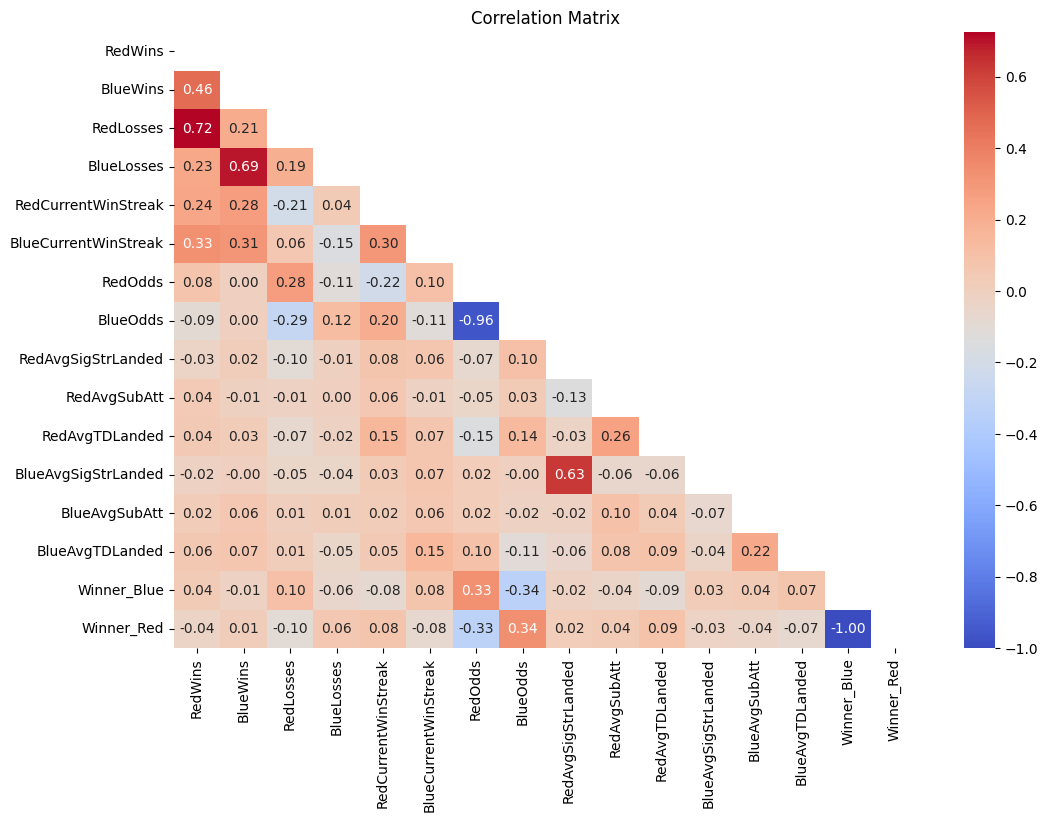

In [9]:
mask = np.triu(df.corr())
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Detect outliers
from scipy import stats
z = np.abs(stats.zscore(df))
df_no_outliers = df[(z < 3).all(axis=1)]
df_no_outliers.drop(columns='Winner_Blue', inplace=True)
print(f'Shape after removing outliers: {df_no_outliers.shape}')


Shape after removing outliers: (4386, 15)


/var/folders/_d/9nvwwyt97xs156nmz906c5pw0000gn/T/ipykernel_59853/3931425652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns='Winner_Blue', inplace=True)


In [11]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4386 entries, 0 to 5248
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RedWins               4386 non-null   float64
 1   BlueWins              4386 non-null   float64
 2   RedLosses             4386 non-null   float64
 3   BlueLosses            4386 non-null   float64
 4   RedCurrentWinStreak   4386 non-null   float64
 5   BlueCurrentWinStreak  4386 non-null   float64
 6   RedOdds               4386 non-null   float64
 7   BlueOdds              4386 non-null   float64
 8   RedAvgSigStrLanded    4386 non-null   float64
 9   RedAvgSubAtt          4386 non-null   float64
 10  RedAvgTDLanded        4386 non-null   float64
 11  BlueAvgSigStrLanded   4386 non-null   float64
 12  BlueAvgSubAtt         4386 non-null   float64
 13  BlueAvgTDLanded       4386 non-null   float64
 14  Winner_Red            4386 non-null   float64
dtypes: float64(15)
memory usag

In [12]:
# Train test splitting and SMOTE Method
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ada = ADASYN(random_state=42)
sm = SMOTE(random_state=2)
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_no_outliers.drop(columns=['Winner_Red'])
y = df_no_outliers[['Winner_Red']]
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, y_train = ada.fit_resample(X_train, y_train) # ADASYN method
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (3160, 14)
Shape of X_test: (1316, 14)


In [13]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import auc, roc_curve

# Fit Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict 
pred_rf = rf.predict(X_test)

# Predict probabilities
Y_predict_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr ,t = roc_curve(y_test, Y_predict_proba)
auc_rf = auc(fpr, tpr)

# Evaluate model on testing
print(f'Testing Accuracy for Random Forest: {accuracy_score(y_test, pred_rf):.3f}\nf1_score: {f1_score(y_test, pred_rf):.3f}')
print(f'AUC Score for Random Forest:{auc_rf:.3f}\n')


# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict
pred_dt = dt.predict(X_test)

# Predict probabilities
Y_predict_proba = dt.predict_proba(X_test)[:, 1]

fpr, tpr ,t = roc_curve(y_test, Y_predict_proba)
auc_dt = auc(fpr, tpr)

# Evaluate model on testing
print(f'Testing Accuracy for Decision Tree: {accuracy_score(y_test, pred_dt):.3f}\nf1_score: {f1_score(y_test, pred_dt):.3f}')
print(f'AUC Score for Decision Tree:{auc_dt:.3f}\n')


# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

# Predict
pred_lr = lr.predict(X_test)

# Predict probabilities
Y_predict_proba = lr.predict_proba(X_test)[:, 1]

fpr, tpr ,t = roc_curve(y_test, Y_predict_proba)
auc_lr = auc(fpr, tpr)

# Evaluate model on testing
print(f'Testing Accuracy for Logistic Regression: {accuracy_score(y_test, pred_lr):.3f}\nf1_score: {f1_score(y_test, pred_lr):.3f}')
print(f'AUC Score for Logistic Regression:{auc_lr:.3f}')




Testing Accuracy for Random Forest: 0.634
f1_score: 0.704
AUC Score for Random Forest:0.672

Testing Accuracy for Decision Tree: 0.563
f1_score: 0.622
AUC Score for Decision Tree:0.553

Testing Accuracy for Logistic Regression: 0.645
f1_score: 0.705
AUC Score for Logistic Regression:0.695


In [14]:
# Increase Accuracy / Optimize Random Forest Model

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Random parameter
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
}

# Randomized Search 
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Train randomized serch
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Optimized Random Forest Model
optimized_rf = random_search.best_estimator_

pred_optimized_rf = optimized_rf.predict(X_test)
print(f'Testing Accuracy for Optimized RF: {accuracy_score(y_test, pred_optimized_rf):.3f}')



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=70; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=124; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=124; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=124; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=124; total time=   0.6s
[CV] END max_depth=20, min_samples

                 Feature  Importance
7               BlueOdds    0.164852
6                RedOdds    0.163769
8     RedAvgSigStrLanded    0.095267
11   BlueAvgSigStrLanded    0.085624
10        RedAvgTDLanded    0.076912
13       BlueAvgTDLanded    0.072584
9           RedAvgSubAtt    0.061082
12         BlueAvgSubAtt    0.053291
0                RedWins    0.049108
1               BlueWins    0.043760
2              RedLosses    0.041633
3             BlueLosses    0.037395
4    RedCurrentWinStreak    0.029373
5   BlueCurrentWinStreak    0.025351


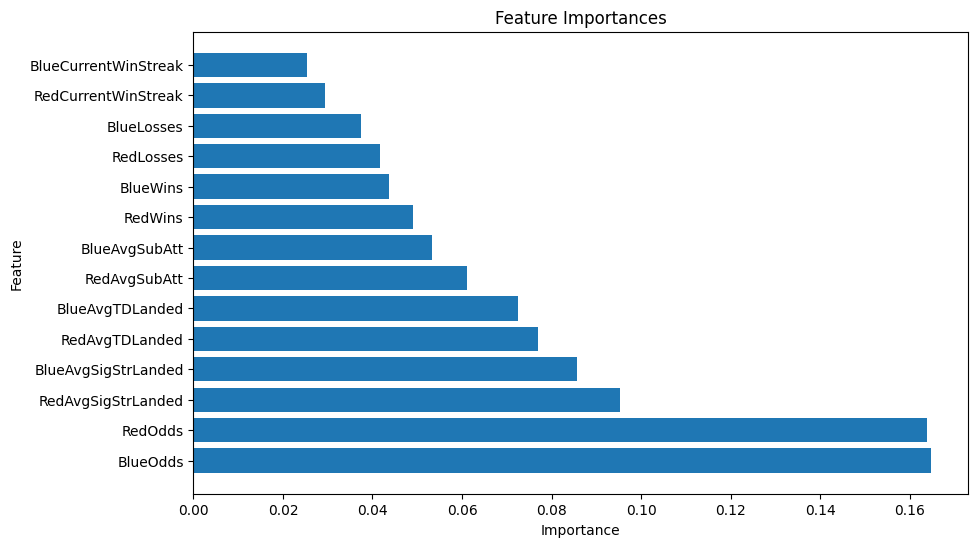

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Özellik önemlerini inceleyin
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': optimized_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [18]:
# Predict upcoming UFC 311 dataset
upcoming = pd.read_csv('datas/UFC311.csv')
upcomingx = upcoming.drop(columns=['RedFighter','BlueFighter']) 
upcomingx = upcomingx.astype(float)
upcomingx = pd.DataFrame(scaler.fit_transform(upcomingx), columns=upcomingx.columns) # Normalize  
upcomingx['Winner_Red'] = lr.predict(upcomingx.drop(columns='Winner_Red')) # Predict winner
print(upcomingx[['Winner_Red']])
# Set Winners names 
upcomingx['Winner'] = upcoming['RedFighter']
upcomingx.loc[upcomingx['Winner_Red'] == 0, 'Winner'] = upcoming['BlueFighter']


print(upcomingx[['Winner']])

   Winner_Red
0         1.0
1         0.0
2         1.0
3         0.0
4         1.0
              Winner
0     Islam Makachev
1  Umar Nurmagomedov
2     Jiri Prochazka
3     Renato Moicano
4      Kevin Holland


/Users/efeemirhandogan/.pyenv/versions/3.13.0/lib/python3.13/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/efeemirhandogan/.pyenv/versions/3.13.0/lib/python3.13/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/Users/efeemirhandogan/.pyenv/versions/3.13.0/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
